# Denoising by Delaunay triangulation on zeros

In [1]:
import numpy as np
from numpy import pi as pi
import matplotlib.pyplot as plt
from src.utilities.utilstf import *
from mcsm_benchmarks.SignalBank import SignalBank
from mcsm_benchmarks.Benchmark import Benchmark
from src.methods.method_delaunay_triangulation import delaunay_triangulation_denoising


In [2]:
np.random.seed(0) 
N = 2**10
sbank = SignalBank(N=N, return_signal=True)
tmin = sbank.tmin
tmax = sbank.tmax
s = sbank.signal_mc_multi_linear_2()



In [3]:
SNRin = 20
noise = np.random.randn(N,)
signal = Benchmark.sigmerge(s,noise,SNRin)

In [4]:
Nfft = 2*1024

output = delaunay_triangulation_denoising(signal,
                                return_dic=True,
                                grouping = False,
                                adapt_thr=True,
                                # min_group_size=5,
                                # LB = 1.7,
                                Nfft=Nfft,
                                )                               

signal_output2, mask2, tri, tri_select, zeros = ( output[key] for key in 
                                    ('s_r','mask','tri','tri_select','zeros')
                                    )




A curve_set(1d) object with 2500 curves observed at 9 argument values
(1 observed, 2499 simulated).
Contains: 
$ r     :  num [1:9] 0.673 0.715 0.757 0.8 0.842 ...
$ funcs :  num [1:9, 1:2500] 1.16 1.21 1.25 1.29 1.32 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:9] "17" "18" "19" "20" ...
  ..$ : chr [1:2500] "obs" "sim1" "sim2" "sim3" ...



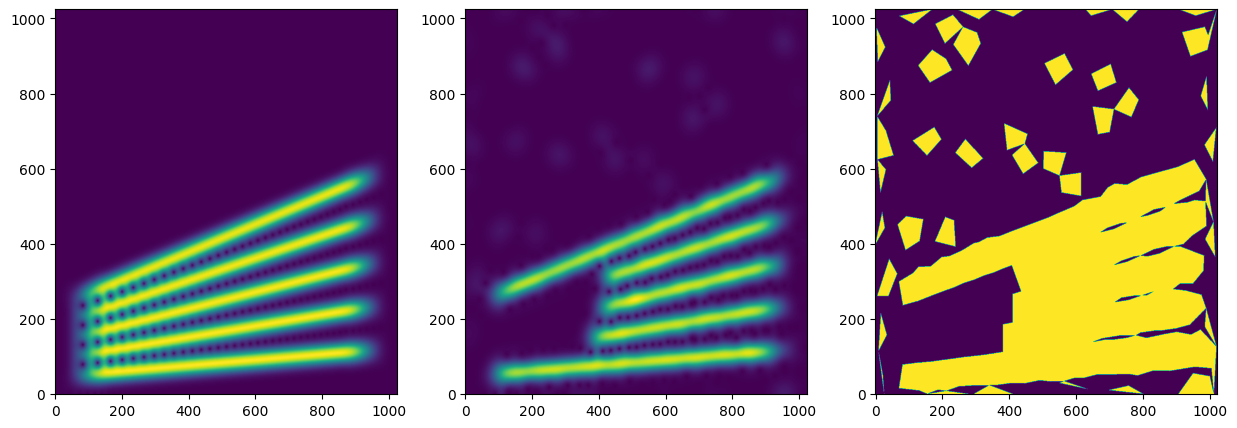

In [5]:
S, F = get_spectrogram(s, Nfft=Nfft)
F = F[0:Nfft//2+1]

S_output, F_output = get_spectrogram(signal_output2, Nfft=Nfft)
F_output = F_output[0:Nfft//2+1]

fig, ax = plt.subplots(1,3,figsize = (15,5))
ax[0].imshow(abs(F), origin='lower', aspect='auto')#, cmap=cmocean.cm.deep)
# [ax[0].plot(instf[np.where(instf>=0)]*Nfft,'r') for instf in signal.instf]
ax[1].imshow(abs(F_output), origin='lower', aspect='auto')#, cmap=cmocean.cm.deep)
# ax[2].imshow(abs(F_output-F), origin='lower')#, cmap=cmocean.cm.deep)
ax[2].imshow(mask2, origin='lower', aspect='auto')#, cmap=cmocean.cm.deep)

plt.show()

In [6]:
tmin = int(np.sqrt(Nfft))
tmax = N-tmin
print(Benchmark.snr_comparison(s,signal_output2,tmin=tmin,tmax=tmax))

6.608944000638992


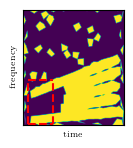

In [7]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig, ax = plt.subplots(1,1,figsize = (1.3,1.5))
# ax.imshow(abs(F_output)**2, origin='lower', aspect='auto')#, cmap=cmocean.cm.deep)
ax.imshow(abs(mask2)**2, origin='lower', aspect='auto')#, cmap=cmocean.cm.deep)
ax.plot([50,50],[5, 400],'r--')
ax.plot([50,300],[5, 5],'r--')
ax.plot([300,300],[5, 400],'r--')
ax.plot([50,300],[400, 400],'r--')
ax.set_ylabel('frequency', fontsize=6)
ax.set_xlabel('time', fontsize=6)
ax.tick_params(axis='both', which='both', bottom=False, top=False, 
                    labelbottom=False, right=False, left=False, labelleft=False)


plt.show()
fig.savefig('figures/errors_dt_panel_1.pdf', dpi=900, transparent=False, bbox_inches='tight', 
            pad_inches=0.01)


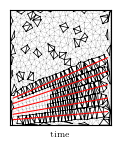

In [8]:
fig, ax = plt.subplots(1,1,figsize = (1.3,1.5))
ax.triplot(zeros[:,1],zeros[:,0],tri, linewidth=0.1, color='k', linestyle='--')
ax.triplot(zeros[:,1],zeros[:,0],tri_select, linewidth=0.5, color='k')
[ax.plot(np.arange(0,N)[np.where(instf>0)],instf[np.where(instf>0)]*Nfft,'r',linewidth=0.75) for instf in signal.instf]
ax.tick_params(axis='both', which='both', bottom=False, top=False, 
                    labelbottom=False, right=False, left=False, labelleft=False)

# ax.set_ylabel('frequency')
ax.set_xlabel('time', fontsize=6)
# ax.spines["top"].set_visible(False)
# ax.spines["right"].set_visible(False)
# ax.spines["bottom"].set_visible(False)
# ax.spines["left"].set_visible(False)
ax.set_xlim([0,N])
ax.set_ylim([0,N])


plt.show()
fig.savefig('figures/errors_dt_panel_2.pdf', dpi=900, transparent=False, bbox_inches='tight', 
            pad_inches=0.01) 

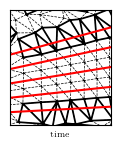

In [9]:
fig, ax = plt.subplots(1,1,figsize = (1.3,1.5))
# ax.imshow(abs(F), origin='lower')#, cmap=cmocean.cm.deep)
ax.triplot(zeros[:,1],zeros[:,0],tri, linewidth=0.5, color='k', linestyle='--')
ax.triplot(zeros[:,1],zeros[:,0],tri_select, linewidth=1.25, color='k')
[ax.plot(np.arange(0,N)[np.where(instf>0)],instf[np.where(instf>0)]*Nfft,'r') for instf in signal.instf]
ax.set_xlim([50,300])
ax.set_ylim([5,400])
ax.tick_params(axis='both', which='both', bottom=False, top=False, 
                    labelbottom=False, right=False, left=False, labelleft=False)

ax.set_xlabel('time', fontsize=6)
plt.show()
fig.savefig('figures/errors_dt_panel_3.pdf', dpi=900, transparent=False, bbox_inches='tight', 
            pad_inches=0.01) 